## Covert all the .vcf files from step #7 into dataframes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


    

In [2]:
import io
import os
import pandas as pd

##The following function was adatpted from https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})
    return 
##open each .vcf file as Dataframe
f1=read_vcf("/Users/cmdb/week2/A01_09_filter_annot.vcf")
f1

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,Sample1
0,chrI,310,.,A,C,0.0,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=4;CIGAR=1X;DP=10;...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:160.002:10:6:203:4:8:0,-17.8598"
1,chrI,362,.,A,C,0.0,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=4;CIGAR=1X;DP=15;...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:160.002:15:11:293:4:16:0,-25.1447"
2,chrI,1025,.,C,T,1.49176E-14,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=3;CIGAR=1X;DP=15;...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:144.641:15:12:342:3:86:0,-19.2956"
3,chrI,1074,.,C,A,1.43747E-14,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=9;CIGAR=1X;DP=29;...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:144.802:29:19:577:9:205:0,-19.5276"
4,chrI,1101,.,G,A,51.7296,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=14;CIGAR=1X;DP=28...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:51.7296:28:14:412:14:493:-2.01994,0"
...,...,...,...,...,...,...,...,...,...,...
18523,chrXVI,942296,.,A,G,544.265,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=22;CIGAR=1X;DP=22...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:160.002:22:0:0:22:700:-63.2848,0"
18524,chrXVI,942377,.,A,G,386.869,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=20;CIGAR=1X;DP=20...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:148.233:20:0:0:20:644:-49.3782,0"
18525,chrXVI,942573,.,C,G,0.0298927,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=4;CIGAR=1X;DP=8;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:21.6371:8:4:137:4:111:0,-2.16072"
18526,chrXVI,942580,.,T,G,2.42152E-4,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=4;CIGAR=1X;DP=9;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:42.5371:9:5:176:4:115:0,-5.15677"


In [3]:
type(f1) #check for the data

pandas.core.frame.DataFrame

## Take the FORMAT column from the dataframe and make another dataframe so we can plot depth distrubution values.

In [4]:
split_format = f1["FORMAT"].str.split(":")
data = split_format.to_list()
names = ["GT", "GQ","DP","RO","QR", "AO", "QA", "GL"]
new_df = pd.DataFrame(data, columns=names)
new_df

,GT,GQ,DP,RO,QR,AO,QA,GL
0,GT,GQ,DP,RO,QR,AO,QA,GL
1,GT,GQ,DP,RO,QR,AO,QA,GL
2,GT,GQ,DP,RO,QR,AO,QA,GL
3,GT,GQ,DP,RO,QR,AO,QA,GL
4,GT,GQ,DP,RO,QR,AO,QA,GL
...,...,...,...,...,...,...,...,...
18523,GT,GQ,DP,RO,QR,AO,QA,GL
18524,GT,GQ,DP,RO,QR,AO,QA,GL
18525,GT,GQ,DP,RO,QR,AO,QA,GL
18526,GT,GQ,DP,RO,QR,AO,QA,GL


In [6]:
##Turn the Sample 1 column into dataframe so we can extract the DP values to make the histogram.

split_sample1 = f1["Sample1"].str.split(":")
data1 = split_sample1.to_list()
names1 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample1 = pd.DataFrame(data1, columns=names1)
new_df_sample1

,GT1,GQ1,DP1,RO1,QR1,AO1,QA1,GL1
0,0,160.002,10,6,203,4,8,"0,-17.8598"
1,0,160.002,15,11,293,4,16,"0,-25.1447"
2,0,144.641,15,12,342,3,86,"0,-19.2956"
3,0,144.802,29,19,577,9,205,"0,-19.5276"
4,1,51.7296,28,14,412,14,493,"-2.01994,0"
...,...,...,...,...,...,...,...,...
18523,1,160.002,22,0,0,22,700,"-63.2848,0"
18524,1,148.233,20,0,0,20,644,"-49.3782,0"
18525,0,21.6371,8,4,137,4,111,"0,-2.16072"
18526,0,42.5371,9,5,176,4,115,"0,-5.15677"


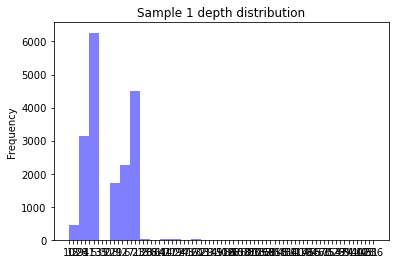

In [7]:
#Make the histogram for the DP values 
Depth_dist=new_df_sample1.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 1 depth distribution")
plt.show()

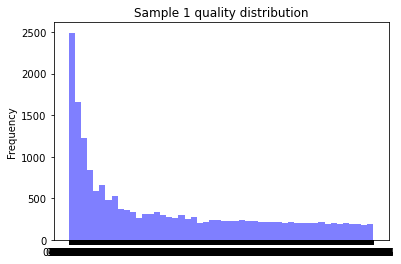

In [8]:
Quality_dist=new_df_sample1.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 1 quality distribution")
plt.show()

In [9]:
##Turn the info column form the orginal dataframe into its own dataframe. 
#Since we only will be using the AF (Allele frequnecy) and the data from snpeff I only gave them name everything else is number. 
#A total of 43 columns.
split_info = f1["INFO"].str.split(";")
info_data = split_info.to_list()
info_names = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample1_info = pd.DataFrame(info_data, columns=info_names)
new_df_sample1_info

,AB,ABP,AC,AF,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,snpeff,43
0,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=4,CIGAR=1X,DP=10,DPB=10,DPRA=0,...,RUN=1,SAF=4,SAP=11.6962,SAR=0,SRF=6,SRP=16.0391,SRR=0,TYPE=snp,ANN=C|upstream_gene_variant|MODIFIER|YAL069W|Y...,None
1,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=4,CIGAR=1X,DP=15,DPB=15,DPRA=0,...,RUN=1,SAF=4,SAP=11.6962,SAR=0,SRF=11,SRP=26.8965,SRR=0,TYPE=snp,ANN=C|missense_variant|MODERATE|YAL069W|YAL069...,None
2,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=3,CIGAR=1X,DP=15,DPB=15,DPRA=0,...,RUN=1,SAF=3,SAP=9.52472,SAR=0,SRF=12,SRP=29.068,SRR=0,TYPE=snp,ANN=T|upstream_gene_variant|MODIFIER|YAL067W-A...,None
3,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=9,CIGAR=1X,DP=29,DPB=29,DPRA=0,...,RUN=1,SAF=9,SAP=22.5536,SAR=0,SRF=19,SRP=44.2683,SRR=0,TYPE=snp,ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A...,None
4,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=14,CIGAR=1X,DP=28,DPB=28,DPRA=0,...,RUN=1,SAF=14,SAP=33.4109,SAR=0,SRF=14,SRP=33.4109,SRR=0,TYPE=snp,ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18523,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=22,CIGAR=1X,DP=22,DPB=22,DPRA=0,...,RUN=1,SAF=22,SAP=50.7827,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
18524,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=20,CIGAR=1X,DP=20,DPB=20,DPRA=0,...,RUN=1,SAF=20,SAP=46.4397,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
18525,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=4,CIGAR=1X,DP=8,DPB=8,DPRA=0,...,RUN=1,SAF=4,SAP=11.6962,SAR=0,SRF=4,SRP=11.6962,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
18526,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=4,CIGAR=1X,DP=9,DPB=9,DPRA=0,...,RUN=1,SAF=4,SAP=11.6962,SAR=0,SRF=5,SRP=13.8677,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None


In [10]:
#From the previous dataframe take the allele freq value and split it into two columns. 
AF_df = new_df_sample1_info["AF"].str.split("=")
AF = AF_df.to_list()
AF_name=["AF", "AF Value"]
AF_df2=pd.DataFrame(AF,columns=AF_name)
AF_df2

,AF,AF Value
0,AF,0
1,AF,0
2,AF,0
3,AF,0
4,AF,1
...,...,...
18523,AF,1
18524,AF,1
18525,AF,0
18526,AF,0


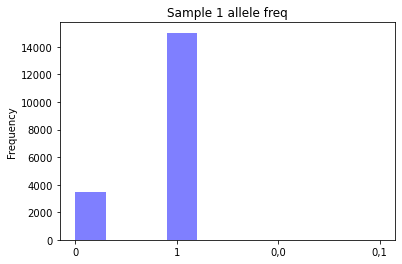

In [11]:
#Plot the allele freq vlaues 
allele_freq=AF_df2.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 1 allele freq")
plt.show()

In [13]:
##From the dataframe I created for the INFO column (new_df_sample1_info) I wanted to pull out 
#the information that was added by SNPeff which is column 42 which I had labed "snpeff". 
#I then proceeded to create a dataframe out of that column.
#SN_df = new_df_sample2["snpeff"].str.split("|")
#sn = SN_df.to_list()
#name5=["AF", "AF Value"]
#SN1=pd.DataFrame(sn)
#SN1

In [ ]:
#Since there are 285 couluman i chose to only look at the first 10. This way I can name them and select particular ones.
SN1_sample1= SN1.iloc[: , :10]
SN2_sample1= SN1.iloc[: , 1:2]
SN2_sample1

## Follow the above steps for all the vcf created and the plot all the graph togther at the end. 

In [14]:
f2=read_vcf("/Users/cmdb/week2/A01_11_filter_annot.vcf")
f2

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,Sample2
0,chrI,968,.,C,T,42.561,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=2;CIGAR=1X1M1X;DP...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:42.561:2:0:0:2:64:-6.06226,0"
1,chrI,970,.,G,A,42.561,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=2;CIGAR=1X1M1X;DP...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:42.561:2:0:0:2:64:-6.06226,0"
2,chrI,980,.,A,G,48.1448,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=2;CIGAR=2X;DP=2;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:48.1448:2:0:0:2:70:-6.62066,0"
3,chrI,981,.,A,C,48.1448,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=2;CIGAR=2X;DP=2;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:48.1448:2:0:0:2:70:-6.62066,0"
4,chrI,1074,.,C,A,0.678563,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=6;CIGAR=1X;DP=6;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:0.678563:6:0:0:6:129:-4.64672,0"
...,...,...,...,...,...,...,...,...,...,...
23398,chrXVI,942589,.,G,A,6.11115E-9,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=10;CIGAR=1X;DP=20...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:88.5166:20:10:312:10:293:0,-6.6933"
23399,chrXVI,942644,.,C,T,18.47,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=11;CIGAR=1X;DP=20...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:18.47:20:9:242:11:312:-3.41274,0"
23400,chrXVI,942720,.,T,C,14.508,.,AB=0;ABP=0;AC=0;AF=0;AN=1;AO=2;CIGAR=1X;DP=8;D...,GT:GQ:DP:RO:QR:AO:QA:GL,"0:0.156601:8:6:154:2:70:0,-2.17722"
23401,chrXVI,942826,.,C,G,90.3012,.,AB=0;ABP=0;AC=1;AF=1;AN=1;AO=7;CIGAR=1X2M;DP=1...,GT:GQ:DP:RO:QR:AO:QA:GL,"1:90.3012:14:3:69:7:187:-10.5086,0"


In [15]:
split_sample2 = f2["Sample2"].str.split(":")
data2 = split_sample2.to_list()
names2 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample2 = pd.DataFrame(data2, columns=names2)
new_df_sample2

,GT1,GQ1,DP1,RO1,QR1,AO1,QA1,GL1
0,1,42.561,2,0,0,2,64,"-6.06226,0"
1,1,42.561,2,0,0,2,64,"-6.06226,0"
2,1,48.1448,2,0,0,2,70,"-6.62066,0"
3,1,48.1448,2,0,0,2,70,"-6.62066,0"
4,1,0.678563,6,0,0,6,129,"-4.64672,0"
...,...,...,...,...,...,...,...,...
23398,0,88.5166,20,10,312,10,293,"0,-6.6933"
23399,1,18.47,20,9,242,11,312,"-3.41274,0"
23400,0,0.156601,8,6,154,2,70,"0,-2.17722"
23401,1,90.3012,14,3,69,7,187,"-10.5086,0"


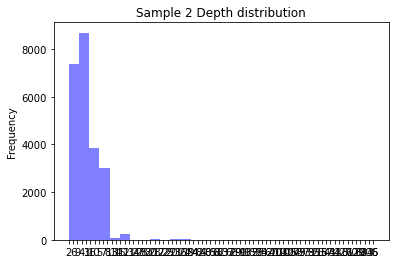

In [16]:
Depth_dist2=new_df_sample2.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist2, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 2 Depth distribution")
plt.show()

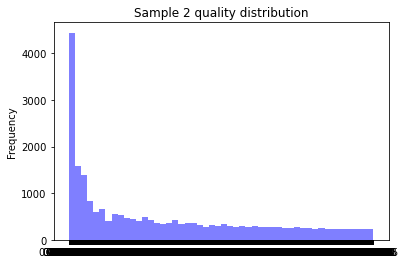

In [17]:
Quality_dist2=new_df_sample2.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist2, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 2 quality distribution")
plt.show()

In [18]:
split_info_sample2 = f2["INFO"].str.split(";")
info_data_sample2 = split_info_sample2.to_list()
info_names_sample2 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample2_info = pd.DataFrame(info_data_sample2, columns=info_names_sample2)
new_df_sample2_info

,AB,ABP,AC,AF,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,snpeff,43
0,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=2,CIGAR=1X1M1X,DP=2,DPB=2,DPRA=0,...,RUN=1,SAF=2,SAP=7.35324,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=T|upstream_gene_variant|MODIFIER|YAL067W-A...,None
1,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=2,CIGAR=1X1M1X,DP=2,DPB=2,DPRA=0,...,RUN=1,SAF=2,SAP=7.35324,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A...,None
2,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=2,CIGAR=2X,DP=2,DPB=2,DPRA=0,...,RUN=1,SAF=2,SAP=7.35324,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|YAL067W-A...,None
3,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=2,CIGAR=2X,DP=2,DPB=2,DPRA=0,...,RUN=1,SAF=2,SAP=7.35324,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=C|upstream_gene_variant|MODIFIER|YAL067W-A...,None
4,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=6,CIGAR=1X,DP=6,DPB=6,DPRA=0,...,RUN=1,SAF=6,SAP=16.0391,SAR=0,SRF=0,SRP=0,SRR=0,TYPE=snp,ANN=A|upstream_gene_variant|MODIFIER|YAL067W-A...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23398,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=10,CIGAR=1X,DP=20,DPB=20,DPRA=0,...,RUN=1,SAF=10,SAP=24.725,SAR=0,SRF=10,SRP=24.725,SRR=0,TYPE=snp,ANN=A|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
23399,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=11,CIGAR=1X,DP=20,DPB=20,DPRA=0,...,RUN=1,SAF=11,SAP=26.8965,SAR=0,SRF=9,SRP=22.5536,SRR=0,TYPE=snp,ANN=T|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
23400,AB=0,ABP=0,AC=0,AF=0,AN=1,AO=2,CIGAR=1X,DP=8,DPB=8,DPRA=0,...,RUN=1,SAF=2,SAP=7.35324,SAR=0,SRF=6,SRP=16.0391,SRR=0,TYPE=snp,ANN=C|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None
23401,AB=0,ABP=0,AC=1,AF=1,AN=1,AO=7,CIGAR=1X2M,DP=14,DPB=14,DPRA=0,...,RUN=1,SAF=7,SAP=18.2106,SAR=0,SRF=3,SRP=9.52472,SRR=0,TYPE=snp,ANN=G|upstream_gene_variant|MODIFIER|ARR1|YPR1...,None


In [19]:
AF_df_sample2 = new_df_sample2_info["AF"].str.split("=")
AF_sample2 = AF_df_sample2.to_list()
AF_name_sample2=["AF", "AF Value"]
AF_df2_sample2=pd.DataFrame(AF_sample2,columns=AF_name_sample2)
AF_df2_sample2

,AF,AF Value
0,AF,1
1,AF,1
2,AF,1
3,AF,1
4,AF,1
...,...,...
23398,AF,0
23399,AF,1
23400,AF,0
23401,AF,1


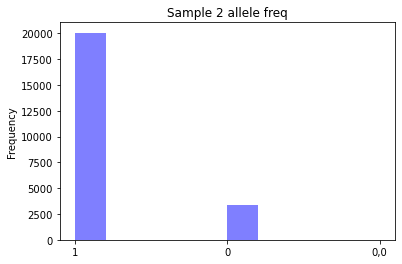

In [20]:
allele_freq_sample2=AF_df2_sample2.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample2, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 2 allele freq")
plt.show()

In [21]:
f3=read_vcf("/Users/cmdb/week2/A01_23_filter_annot.vcf")

In [22]:
split_sample3 = f3["Sample3"].str.split(":")
data3 = split_sample3.to_list()
names3 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample3 = pd.DataFrame(data3, columns=names3)
new_df_sample3

,GT1,GQ1,DP1,RO1,QR1,AO1,QA1,GL1
0,1,0.111589,2,0,0,2,26,"-0.221608,0"
1,1,1.15201,3,0,0,3,88,"-2.19182,0"
2,1,1.15201,3,0,0,3,88,"-2.19182,0"
3,1,1.46501,6,0,0,6,191,"-5.0219,0"
4,1,1.34812,6,0,0,6,183,"-4.97963,0"
...,...,...,...,...,...,...,...,...
20982,0,3.24712,4,2,57,2,51,"0,-0.0461394"
20983,0,56.3425,10,7,154,3,43,"0,-8.51066"
20984,0,63.4376,10,7,95,2,6,"0,-7.77108"
20985,1,0.111825,7,0,0,7,230,"-4.73799,0"


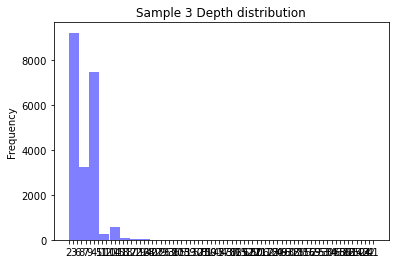

In [23]:
Depth_dist3=new_df_sample3.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist3, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 3 Depth distribution")
plt.show()

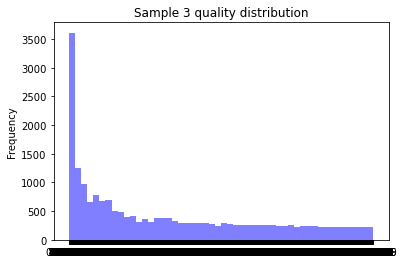

In [24]:
Quality_dist3=new_df_sample3.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist3, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 3 quality distribution")
plt.show()

In [25]:
split_info_sample3 = f3["INFO"].str.split(";")
info_data_sample3 = split_info_sample3.to_list()
info_names_sample3 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample3_info = pd.DataFrame(info_data_sample3, columns=info_names_sample3)
#new_df_sample3_info

In [26]:
AF_df_sample3 = new_df_sample3_info["AF"].str.split("=")
AF_sample3 = AF_df_sample3.to_list()
AF_name_sample3=["AF", "AF Value"]
AF_df2_sample3=pd.DataFrame(AF_sample3,columns=AF_name_sample3)
#AF_df2_sample3

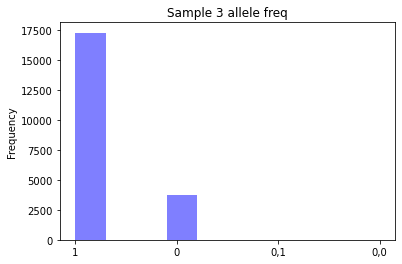

In [27]:
allele_freq_sample3=AF_df2_sample3.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample3, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 3 allele freq")
plt.show()

In [28]:
f4=read_vcf("/Users/cmdb/week2/A01_24_filter_annot.vcf")

In [29]:
split_sample4 = f4["Sample4"].str.split(":")
data4 = split_sample4.to_list()
names4 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample4 = pd.DataFrame(data4, columns=names4)
#new_df_sample4

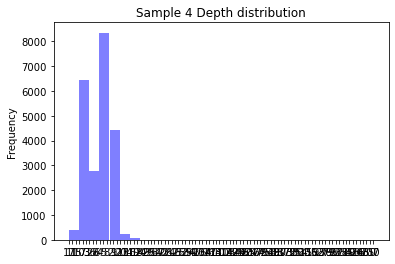

In [30]:
Depth_dist4=new_df_sample4.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist4, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 4 Depth distribution")
plt.show()

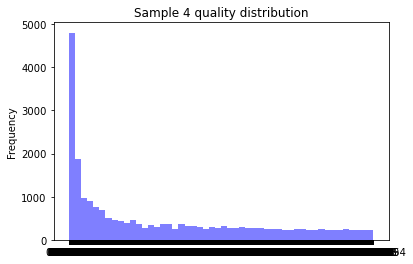

In [31]:
Quality_dist4=new_df_sample4.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist4, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 4 quality distribution")
plt.show()

In [32]:
split_info_sample4 = f4["INFO"].str.split(";")
info_data_sample4 = split_info_sample4.to_list()
info_names_sample4 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample4_info = pd.DataFrame(info_data_sample4, columns=info_names_sample4)
#new_df_sample4_info

In [33]:
AF_df_sample4 = new_df_sample4_info["AF"].str.split("=")
AF_sample4 = AF_df_sample4.to_list()
AF_name_sample4=["AF", "AF Value"]
AF_df2_sample4=pd.DataFrame(AF_sample4,columns=AF_name_sample4)
#AF_df2_sample4

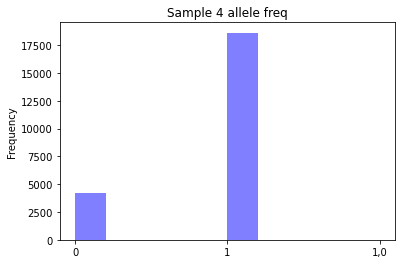

In [34]:
allele_freq_sample4=AF_df2_sample4.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample4, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 4 allele freq")
plt.show()

In [35]:
f5=read_vcf("/Users/cmdb/week2/A01_27_filter_annot.vcf")

In [36]:
split_sample5 = f5["Sample5"].str.split(":")
data5 = split_sample5.to_list()
names5 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample5 = pd.DataFrame(data5, columns=names5)
#new_df_sample5

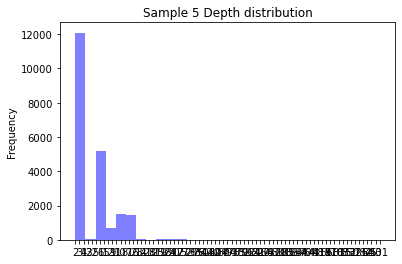

In [37]:
Depth_dist5=new_df_sample5.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist5, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 5 Depth distribution")
plt.show()

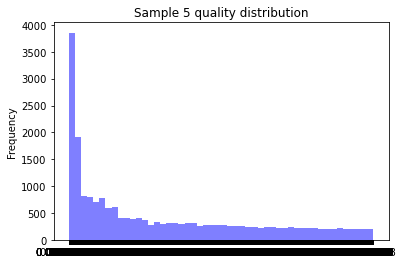

In [38]:
Quality_dist5=new_df_sample5.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist5, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 5 quality distribution")
plt.show()

In [39]:
split_info_sample5 = f5["INFO"].str.split(";")
info_data_sample5 = split_info_sample5.to_list()
info_names_sample5 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample5_info = pd.DataFrame(info_data_sample5, columns=info_names_sample5)
#new_df_sample4_info

In [40]:
AF_df_sample5 = new_df_sample5_info["AF"].str.split("=")
AF_sample5 = AF_df_sample5.to_list()
AF_name_sample5=["AF", "AF Value"]
AF_df2_sample5=pd.DataFrame(AF_sample5,columns=AF_name_sample5)
#AF_df2_sample5

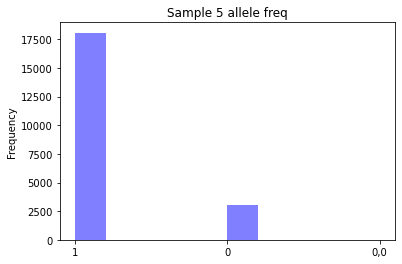

In [41]:
allele_freq_sample5=AF_df2_sample5.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample5, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 5 allele freq")
plt.show()

In [42]:
f6=read_vcf("/Users/cmdb/week2/A01_31_filter_annot.vcf")

In [43]:
split_sample6 = f6["Sample6"].str.split(":")
data6 = split_sample6.to_list()
names6 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample6 = pd.DataFrame(data6, columns=names6)
#new_df_sample6

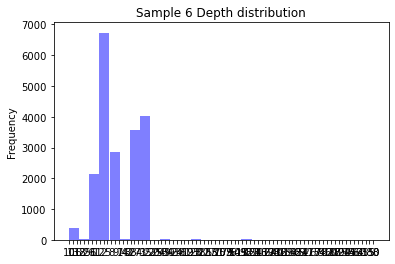

In [44]:
Depth_dist6=new_df_sample6.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist6, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 6 Depth distribution")
plt.show()

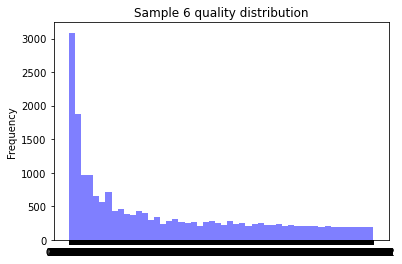

In [45]:
Quality_dist6=new_df_sample6.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist6, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 6 quality distribution")
plt.show()

In [46]:
split_info_sample6 = f6["INFO"].str.split(";")
info_data_sample6 = split_info_sample6.to_list()
info_names_sample6 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43","44"]
new_df_sample6_info = pd.DataFrame(info_data_sample6, columns=info_names_sample6)
#new_df_sample6_info

In [47]:
AF_df_sample6 = new_df_sample6_info["AF"].str.split("=")
AF_sample6 = AF_df_sample6.to_list()
AF_name_sample6=["AF", "AF Value"]
AF_df2_sample6=pd.DataFrame(AF_sample6,columns=AF_name_sample6)
#AF_df2_sample6

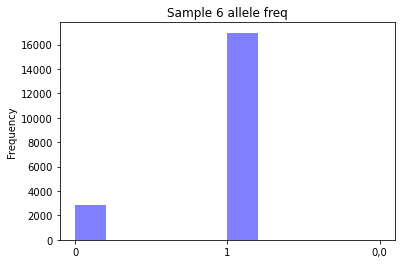

In [48]:
allele_freq_sample6=AF_df2_sample6.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample6, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 6 allele freq")
plt.show()

In [49]:
f7=read_vcf("/Users/cmdb/week2/A01_35_filter_annot.vcf")

In [50]:
split_sample7 = f7["Sample7"].str.split(":")
data7 = split_sample7.to_list()
names7 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample7 = pd.DataFrame(data7, columns=names7)
#new_df_sample7

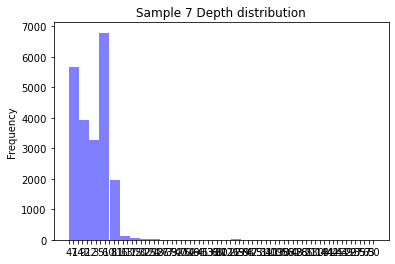

In [51]:
Depth_dist7=new_df_sample7.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist7, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 7 Depth distribution")
plt.show()

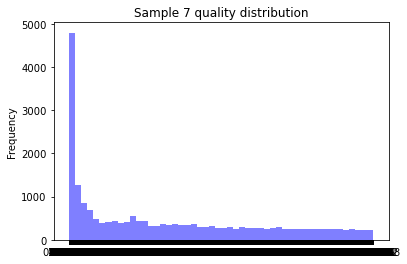

In [52]:
Quality_dist7=new_df_sample7.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist7, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 7 quality distribution")
plt.show()

In [53]:
split_info_sample7 = f7["INFO"].str.split(";")
info_data_sample7 = split_info_sample7.to_list()
info_names_sample7 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample7_info = pd.DataFrame(info_data_sample7, columns=info_names_sample7)
#new_df_sample7_info

In [54]:
AF_df_sample7 = new_df_sample7_info["AF"].str.split("=")
AF_sample7 = AF_df_sample7.to_list()
AF_name_sample7=["AF", "AF Value"]
AF_df2_sample7=pd.DataFrame(AF_sample7,columns=AF_name_sample7)
#AF_df2_sample7

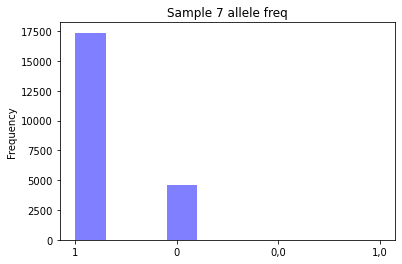

In [55]:
allele_freq_sample7=AF_df2_sample7.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample7, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 7 allele freq")
plt.show()

In [56]:
f8=read_vcf("/Users/cmdb/week2/A01_39_filter_annot.vcf")

In [57]:
split_sample8 = f8["Sample8"].str.split(":")
data8 = split_sample8.to_list()
names8 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample8 = pd.DataFrame(data8, columns=names8)
#new_df_sample8

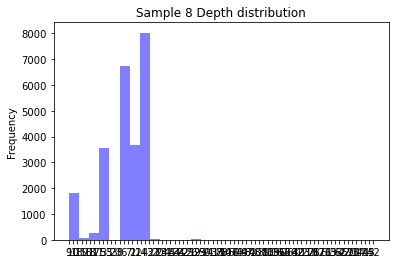

In [58]:
Depth_dist8=new_df_sample8.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist8, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 8 Depth distribution")
plt.show()

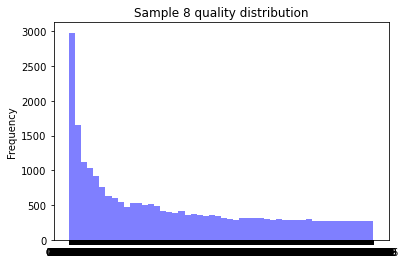

In [59]:
Quality_dist8=new_df_sample8.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist8, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 8 quality distribution")
plt.show()

In [60]:
split_info_sample8 = f8["INFO"].str.split(";")
info_data_sample8 = split_info_sample8.to_list()
info_names_sample8 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample8_info = pd.DataFrame(info_data_sample8, columns=info_names_sample8)
#new_df_sample8_info

In [61]:
AF_df_sample8 = new_df_sample8_info["AF"].str.split("=")
AF_sample8 = AF_df_sample8.to_list()
AF_name_sample8=["AF", "AF Value"]
AF_df2_sample8=pd.DataFrame(AF_sample8,columns=AF_name_sample8)
#AF_df2_sample8

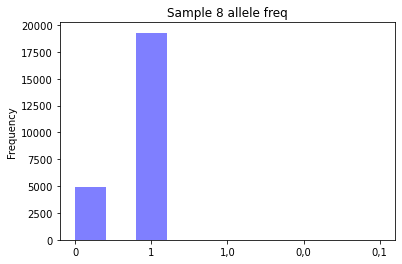

In [62]:
allele_freq_sample8=AF_df2_sample8.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample8, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 8 allele freq")
plt.show()

In [63]:
f9=read_vcf("/Users/cmdb/week2/A01_62_filter_annot.vcf")

In [64]:
split_sample9 = f9["Sample9"].str.split(":")
data9 = split_sample9.to_list()
names9 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample9 = pd.DataFrame(data9, columns=names9)
#new_df_sample9

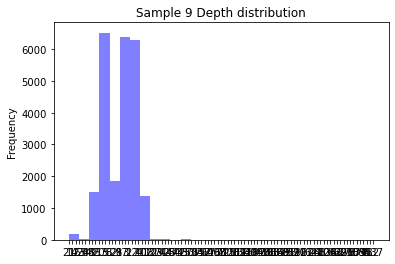

In [65]:
Depth_dist9=new_df_sample9.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist9, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 9 Depth distribution")
plt.show()

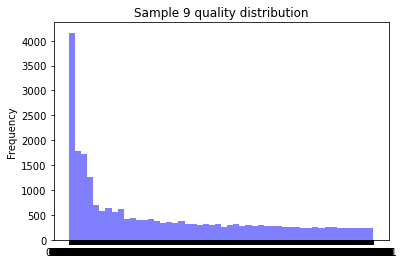

In [66]:
Quality_dist9=new_df_sample9.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist9, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 9 quality distribution")
plt.show()

In [67]:
split_info_sample9 = f9["INFO"].str.split(";")
info_data_sample9 = split_info_sample9.to_list()
info_names_sample9 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43"]
new_df_sample9_info = pd.DataFrame(info_data_sample9, columns=info_names_sample9)
#new_df_sample9_info

In [68]:
AF_df_sample9 = new_df_sample9_info["AF"].str.split("=")
AF_sample9 = AF_df_sample9.to_list()
AF_name_sample9=["AF", "AF Value"]
AF_df2_sample9=pd.DataFrame(AF_sample9,columns=AF_name_sample9)
#AF_df2_sample9

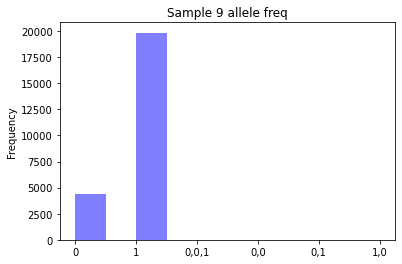

In [69]:
allele_freq_sample9=AF_df2_sample9.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample9, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 9 allele freq")
plt.show()

In [70]:
f10=read_vcf("/Users/cmdb/week2/A01_63_filter_annot.vcf")

In [71]:
split_sample10 = f10["Sample10"].str.split(":")
data10 = split_sample10.to_list()
names10 = ["GT1", "GQ1","DP1","RO1","QR1", "AO1", "QA1", "GL1"]
new_df_sample10 = pd.DataFrame(data10, columns=names10)
#new_df_sample10

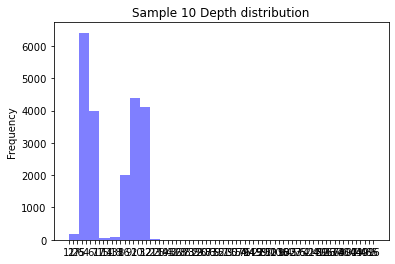

In [72]:
Depth_dist10=new_df_sample10.loc[:,"DP1"]
fig,ax=plt.subplots()
ax.hist(Depth_dist10, color='blue', alpha=0.5,bins=30)
ax.set_ylabel("Frequency")
ax.set_title("Sample 10 Depth distribution")
plt.show()

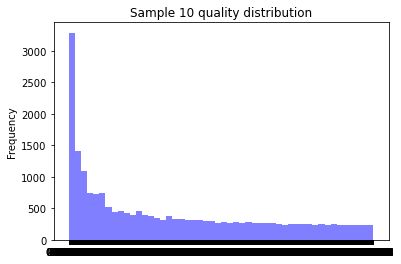

In [73]:
Quality_dist10=new_df_sample10.loc[:,"GQ1"]
fig,ax=plt.subplots()
ax.hist(Quality_dist10, color='blue', alpha=0.5,bins=50)
ax.set_ylabel("Frequency")
ax.set_title("Sample 10 quality distribution")
plt.show()

In [74]:
split_info_sample10 = f10["INFO"].str.split(";")
info_data_sample10 = split_info_sample10.to_list()
info_names_sample10 = ["AB", "ABP","AC","AF","5", "6", "7", "8", "9","10","11","12","13","14","15","16","17","18","19","20","21","22",
"23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","snpeff","43","44"]
new_df_sample10_info = pd.DataFrame(info_data_sample10, columns=info_names_sample10)
#new_df_sample4_info

In [75]:
AF_df_sample10 = new_df_sample10_info["AF"].str.split("=")
AF_sample10 = AF_df_sample10.to_list()
AF_name_sample10=["AF", "AF Value"]
AF_df2_sample10=pd.DataFrame(AF_sample10,columns=AF_name_sample10)
#AF_df2_sample10

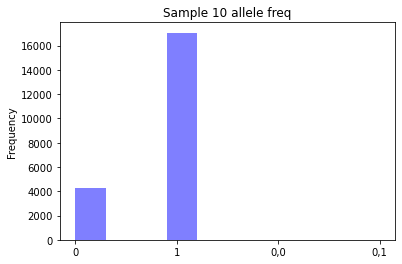

In [76]:
allele_freq_sample10=AF_df2_sample10.loc[:,"AF Value"]
fig,ax=plt.subplots()
ax.hist(allele_freq_sample10, color='blue', alpha=0.5,bins=10)
ax.set_ylabel("Frequency")
ax.set_title("Sample 10 allele freq")
plt.show()

## Graph all plots together

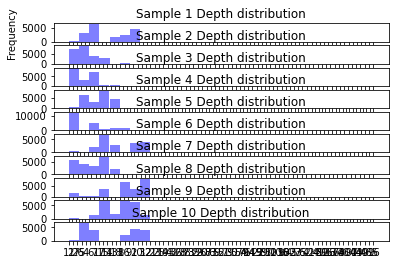

In [77]:
Depth_dist=new_df_sample1.loc[:,"DP1"]
Depth_dist2=new_df_sample2.loc[:,"DP1"]
Depth_dist3=new_df_sample3.loc[:,"DP1"]
Depth_dist4=new_df_sample4.loc[:,"DP1"]
Depth_dist5=new_df_sample5.loc[:,"DP1"]
Depth_dist6=new_df_sample6.loc[:,"DP1"]
Depth_dist7=new_df_sample7.loc[:,"DP1"]
Depth_dist8=new_df_sample8.loc[:,"DP1"]
Depth_dist9=new_df_sample9.loc[:,"DP1"]
Depth_dist10=new_df_sample10.loc[:,"DP1"]

fig,ax=plt.subplots(10)
ax[0].hist(Depth_dist, color='blue', alpha=0.5,bins=30)
ax[1].hist(Depth_dist2, color='blue', alpha=0.5,bins=30)
ax[2].hist(Depth_dist3, color='blue', alpha=0.5,bins=30)
ax[3].hist(Depth_dist4, color='blue', alpha=0.5,bins=30)
ax[4].hist(Depth_dist5, color='blue', alpha=0.5,bins=30)
ax[5].hist(Depth_dist6, color='blue', alpha=0.5,bins=30)
ax[6].hist(Depth_dist7, color='blue', alpha=0.5,bins=30)
ax[7].hist(Depth_dist8, color='blue', alpha=0.5,bins=30)
ax[8].hist(Depth_dist9, color='blue', alpha=0.5,bins=30)
ax[9].hist(Depth_dist10, color='blue', alpha=0.5,bins=30)

ax[0].set_ylabel("Frequency")
ax[0].set_title("Sample 1 Depth distribution")
ax[1].set_title("Sample 2 Depth distribution")
ax[2].set_title("Sample 3 Depth distribution")
ax[3].set_title("Sample 4 Depth distribution")
ax[4].set_title("Sample 5 Depth distribution")
ax[5].set_title("Sample 6 Depth distribution")
ax[6].set_title("Sample 7 Depth distribution")
ax[7].set_title("Sample 8 Depth distribution")
ax[8].set_title("Sample 9 Depth distribution")
ax[9].set_title("Sample 10 Depth distribution")

plt.show()

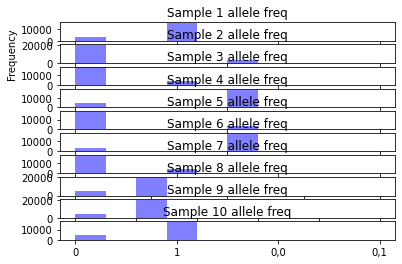

In [78]:
allele_freq=AF_df2.loc[:,"AF Value"]
allele_freq_sample2=AF_df2_sample2.loc[:,"AF Value"]
allele_freq_sample3=AF_df2_sample3.loc[:,"AF Value"]
allele_freq_sample4=AF_df2_sample4.loc[:,"AF Value"]
allele_freq_sample5=AF_df2_sample5.loc[:,"AF Value"]
allele_freq_sample6=AF_df2_sample6.loc[:,"AF Value"]
allele_freq_sample7=AF_df2_sample7.loc[:,"AF Value"]
allele_freq_sample8=AF_df2_sample8.loc[:,"AF Value"]
allele_freq_sample9=AF_df2_sample9.loc[:,"AF Value"]
allele_freq_sample10=AF_df2_sample10.loc[:,"AF Value"]

fig,ax=plt.subplots(10)
ax[0].hist(allele_freq, color='blue', alpha=0.5,bins=10)
ax[1].hist(allele_freq_sample2, color='blue', alpha=0.5,bins=10)
ax[2].hist(allele_freq_sample3, color='blue', alpha=0.5,bins=10)
ax[3].hist(allele_freq_sample4, color='blue', alpha=0.5,bins=10)
ax[4].hist(allele_freq_sample5, color='blue', alpha=0.5,bins=10)
ax[5].hist(allele_freq_sample6, color='blue', alpha=0.5,bins=10)
ax[6].hist(allele_freq_sample7, color='blue', alpha=0.5,bins=10)
ax[7].hist(allele_freq_sample8, color='blue', alpha=0.5,bins=10)
ax[8].hist(allele_freq_sample9, color='blue', alpha=0.5,bins=10)
ax[9].hist(allele_freq_sample10, color='blue', alpha=0.5,bins=10)

ax[1].set_ylabel("Frequency")
ax[0].set_title("Sample 1 allele freq")
ax[1].set_title("Sample 2 allele freq")
ax[2].set_title("Sample 3 allele freq")
ax[3].set_title("Sample 4 allele freq")
ax[4].set_title("Sample 5 allele freq")
ax[5].set_title("Sample 6 allele freq")
ax[6].set_title("Sample 7 allele freq")
ax[7].set_title("Sample 8 allele freq")
ax[8].set_title("Sample 9 allele freq")
ax[9].set_title("Sample 10 allele freq")

plt.show()

In [ ]:
Quality_dist=new_df_sample1.loc[:,"GQ1"]
Quality_dist2=new_df_sample2.loc[:,"GQ1"]
Quality_dist3=new_df_sample3.loc[:,"GQ1"]
Quality_dist4=new_df_sample4.loc[:,"GQ1"]
Quality_dist5=new_df_sample5.loc[:,"GQ1"]
Quality_dist6=new_df_sample6.loc[:,"GQ1"]
Quality_dist7=new_df_sample7.loc[:,"GQ1"]
Quality_dist8=new_df_sample8.loc[:,"GQ1"]
Quality_dist9=new_df_sample9.loc[:,"GQ1"]
Quality_dist10=new_df_sample10.loc[:,"GQ1"]


fig,ax=plt.subplots(10)
ax[0].hist(Quality_dist, color='blue', alpha=0.5,bins=50)
ax[1].hist(Quality_dist2, color='blue', alpha=0.5,bins=50)
ax[2].hist(Quality_dist3, color='blue', alpha=0.5,bins=50)
ax[3].hist(Quality_dist4, color='blue', alpha=0.5,bins=50)
ax[4].hist(Quality_dist5, color='blue', alpha=0.5,bins=50)
ax[5].hist(Quality_dist6, color='blue', alpha=0.5,bins=50)
ax[6].hist(Quality_dist7, color='blue', alpha=0.5,bins=50)
ax[7].hist(Quality_dist8, color='blue', alpha=0.5,bins=50)
ax[8].hist(Quality_dist9, color='blue', alpha=0.5,bins=50)
ax[9].hist(Quality_dist10, color='blue', alpha=0.5,bins=50)


ax[0].set_ylabel("Frequency")
ax[0].set_title("Sample 1 quality distribution")
ax[1].set_title("Sample 2 quality distribution")
ax[2].set_title("Sample 3 quality distribution")
ax[3].set_title("Sample 4 quality distribution")
ax[4].set_title("Sample 5 quality distribution")
ax[5].set_title("Sample 6 quality distribution")
ax[6].set_title("Sample 7 quality distribution")
ax[7].set_title("Sample 8 quality distribution")
ax[8].set_title("Sample 9 quality distribution")
ax[9].set_title("Sample 10 quality distribution")

plt.show()